# **Breast Cancer Detaction**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

**Sorting the data**

In [ ]:
df = pd.read_csv("data.csv", index_col = 'id')
df.drop('Unnamed: 32',axis = 1 ,inplace = True)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B':0})
X = df.drop('diagnosis',axis = 1)
perimeters = [x for x in df.columns if 'perimeter' in x]
areas = [x for x in df.columns if 'area' in x]
df.drop(perimeters, axis = 1 ,inplace = True)
df.drop(areas, axis = 1 ,inplace = True)
worst = [col for col in df.columns if col.endswith('_worst')]
df.drop(worst, axis = 1 ,inplace = True)
df

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
id,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193
842517,1,20.57,17.77,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532
84300903,1,19.69,21.25,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571
84348301,1,11.42,20.38,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208
84358402,1,20.29,14.34,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,1,21.56,22.39,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239
926682,1,20.13,28.25,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498
926954,1,16.60,28.08,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892


# **KNN**

In [ ]:
y = df['diagnosis']
X = df.drop(['diagnosis'], axis=1).values
X_scaled= StandardScaler().fit_transform(X)
 
#Define k-NN classifier and train on a scaled dataset#
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_scaled, y)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

**To assign the class, when neighbors don’t have the same class, we can set 'weights' parameter:**

1.= 'uniform' takes a simple majority vote from the neighbors. Whichever class has the greatest number of votes becomes the class for the new data point.  
2.= 'distance' takes a similar vote except gives a heavier weight to those neighbors that are closer. For example, if the neighbor is 5 units away, then weight its vote 1/5. As the neighbor gets further away, the weight gets smaller.

In [ ]:
knn_params = {'n_neighbors': range(1, 11), 'weights':['uniform', 'distance']}
 
X_scaled_train, X_scaled_holdout, y_train, y_holdout = train_test_split(X_scaled, y, test_size=0.3, random_state=17)
 
#knn_grid.best_estimator_.predict(X_scaled_train)
knn_grid = GridSearchCV(knn, knn_params, cv=10, n_jobs=-1, scoring='recall')
 
knn_grid.fit(X_scaled_train, y_train)
 
knn_grid.best_params_, knn_grid.best_score_

({'n_neighbors': 1, 'weights': 'uniform'}, 0.9341666666666667)

In [ ]:
pred = knn_grid.best_estimator_.predict(X_scaled_holdout)
 
print ("Accuracy Score : ",accuracy_score(y_holdout, pred))
print ("Recall Score (how much of malignant tumours were predicted correctly) : ",recall_score(y_holdout, pred) )
print ("Precision Score (how much of tumours, which were predicted as 'malignant', were actually 'malignant'): ",precision_score(y_holdout, pred))

Accuracy Score :  0.9181286549707602
Recall Score (how much of malignant tumours were predicted correctly) :  0.9180327868852459
Precision Score (how much of tumours, which were predicted as 'malignant', were actually 'malignant'):  0.8615384615384616


In [ ]:
cm = confusion_matrix(y_holdout, pred)
cm

array([[101,   9],
       [  5,  56]])

**we can compare score on train an test sets for different number of neighbors:**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Recall')

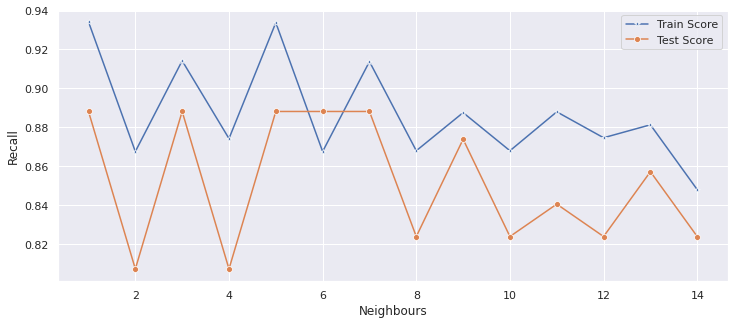

In [ ]:
from sklearn.model_selection import cross_val_score
 
test_scores = []
train_scores = []
 
for i in range(1,15):
 
    knn = KNeighborsClassifier(i)
    train_scores.append(cross_val_score(knn, X_scaled_train,y_train,cv=10, scoring='recall').mean())
    test_scores.append(cross_val_score(knn, X_scaled_holdout,y_holdout,cv=10, scoring='recall').mean())
    
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')
plt.xlabel("Neighbours")
plt.ylabel("Recall")

# **Naïve Bayes**

In [ ]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
 
#Create a Gaussian Classifier
gnb = GaussianNB()
 
#Train the model using the training sets
gnb.fit(X_scaled_train,y_train)
 
#Predict the response for test dataset
y_pred = gnb.predict(X_scaled_holdout)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
 
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_holdout, y_pred))
print ("Recall Score (how much of malignant tumours were predicted correctly) : ",recall_score(y_holdout, y_pred) )
print ("Precision Score (how much of tumours, which were predicted as 'malignant', were actually 'malignant'): ",precision_score(y_holdout, y_pred))

Accuracy: 0.9415204678362573
Recall Score (how much of malignant tumours were predicted correctly) :  0.9016393442622951
Precision Score (how much of tumours, which were predicted as 'malignant', were actually 'malignant'):  0.9322033898305084


# We can conclude that Naïve Bayes have slightly imporved the accuracy and precision scores.